# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [33]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [34]:
browser = Browser('chrome')

The chromedriver version (133.0.6943.141) detected in PATH at /usr/local/bin/chromedriver might not be compatible with the detected chrome version (134.0.6998.89); currently, chromedriver 134.0.6998.88 is recommended for chrome 134.*, so it is advised to delete the driver in PATH and retry


### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [35]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [36]:
html = browser.html

# Create a Beautiful Soup Object
soup = BeautifulSoup(html, 'html.parser')

In [37]:
# Extract all rows of data
# Find the table
table = soup.find('table')

# Create an empty list to hold all the rows
data = []

# Loop through all rows in the table body
rows = table.find_all('tr')

for row in rows:
    # Get all cells in this row
    cells = row.find_all('td')
    
    # If the row has cells (not a header row)
    if len(cells) > 0:
        row_data = [cell.text.strip() for cell in cells]
        data.append(row_data)


### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [38]:
# Create an empty list
mars_data = []

# Extract all rows from the table
table = soup.find('table')
rows = table.find_all('tr')

# Loop through the rows and get each cell value
for row in rows:
    cells = row.find_all('td')
    if len(cells) > 0:  # ignore header row
        row_data = [cell.text.strip() for cell in cells]
        mars_data.append(row_data)



In [39]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names

# Define column names based on the headings provided in the instructions
columns = ["id", "terrestrial_date", "sol", "ls", "month", "min_temp", "pressure"]

# Create the DataFrame
mars_df = pd.DataFrame(mars_data, columns=columns)


In [40]:
# Confirm DataFrame was created successfully
print(mars_df.head())

   id terrestrial_date sol   ls month min_temp pressure
0   2       2012-08-16  10  155     6    -75.0    739.0
1  13       2012-08-17  11  156     6    -76.0    740.0
2  24       2012-08-18  12  156     6    -76.0    741.0
3  35       2012-08-19  13  157     6    -74.0    732.0
4  46       2012-08-20  14  157     6    -74.0    740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [41]:
# Examine data type of each column
mars_df.dtypes


id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [42]:
# Change data types for data analysis

mars_df['terrestrial_date'] = pd.to_datetime(mars_df['terrestrial_date'])
mars_df['sol'] = mars_df['sol'].astype(int)
mars_df['ls'] = mars_df['ls'].astype(int)
mars_df['month'] = mars_df['month'].astype(int)
mars_df['min_temp'] = mars_df['min_temp'].astype(float)
mars_df['pressure'] = mars_df['pressure'].astype(float)

In [43]:
# Confirm type changes were successful by examining data types again
mars_df.dtypes

id                          object
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [44]:
# 1. How many months are there on Mars?
mars_df['month'].nunique()

12

In [45]:
# 2. How many sols (Martian days) worth of data are there?
mars_df['sol'].nunique()

1867

In [46]:
# 3. What is the average minimum temperature by month?
# Average min temp per month
avg_temp_by_month = mars_df.groupby('month')['min_temp'].mean().sort_values()

print(avg_temp_by_month)

month
3    -83.307292
4    -82.747423
2    -79.932584
5    -79.308725
1    -77.160920
6    -75.299320
12   -74.451807
7    -72.281690
11   -71.985507
10   -71.982143
9    -69.171642
8    -68.382979
Name: min_temp, dtype: float64


<Axes: title={'center': 'Average Minimum Temperature by Month'}, xlabel='month'>

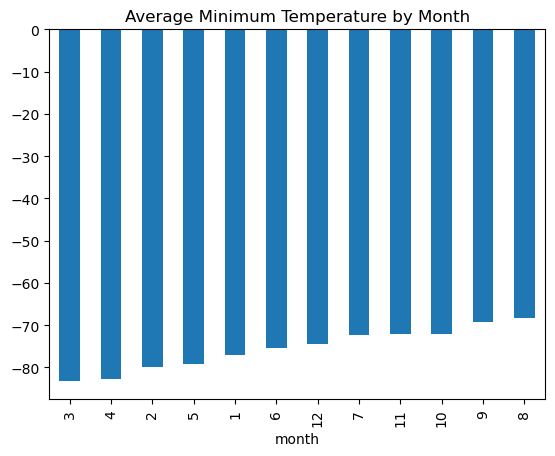

In [47]:
# Plot the average minimum temperature by month
avg_temp_by_month.plot(kind='bar', title='Average Minimum Temperature by Month')


In [48]:
# Identify the coldest and hottest months in Curiosity's location by sorting the previous graph
coldest_month = avg_temp_by_month.idxmin()
hottest_month = avg_temp_by_month.idxmax()

print(f"The coldest month on Mars is: {coldest_month}")
print(f"The hottest month on Mars is: {hottest_month}")

The coldest month on Mars is: 3
The hottest month on Mars is: 8


In [49]:
# 4. What is the average pressure by month?
avg_pressure_by_month = mars_df.groupby('month')['pressure'].mean().sort_values()
print(avg_pressure_by_month)

month
6     745.054422
5     748.557047
7     795.105634
4     806.329897
12    842.156627
11    857.014493
1     862.488506
8     873.829787
3     877.322917
10    887.312500
2     889.455056
9     913.305970
Name: pressure, dtype: float64


<Axes: title={'center': 'Average Atmospheric Pressure by Month'}, xlabel='month'>

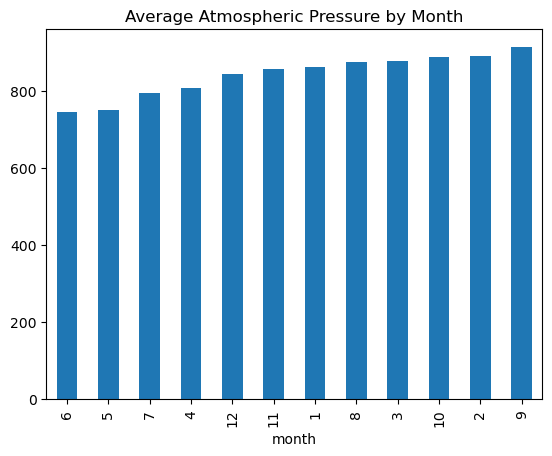

In [50]:
# Plot the average pressure by month
avg_pressure_by_month.plot(kind='bar', title='Average Atmospheric Pressure by Month')

In [51]:
# Identify the lowest and highest pressure months in Curiosity's location by sorting the previous graph
lowest_pressure_month = avg_pressure_by_month.idxmin()
highest_pressure_month = avg_pressure_by_month.idxmax()

print(f"The lowest pressure month on Mars is: {lowest_pressure_month}")
print(f"The highest pressure month on Mars is: {highest_pressure_month}")


The lowest pressure month on Mars is: 6
The highest pressure month on Mars is: 9


<Axes: title={'center': 'Daily Minimum Temperature on Mars'}, xlabel='terrestrial_date'>

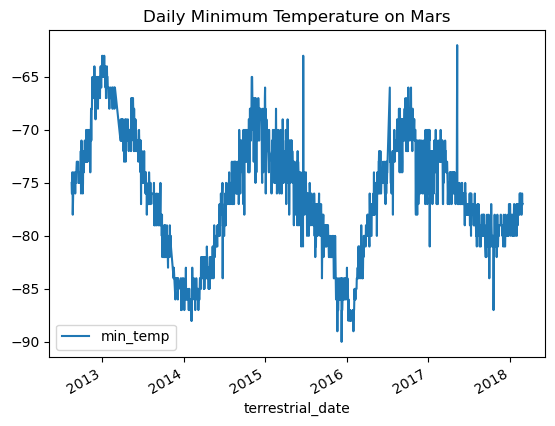

In [52]:
# 5. How many terrestrial (Earth) days are there in a Martian year?
# Visually estimate the result by plotting the daily minimum temperature of each observation in the data set.
mars_df.plot(x='terrestrial_date', y='min_temp', title='Daily Minimum Temperature on Mars')

#### Minimum Temperature

YOUR ANALYSIS HERE

The coldest month on Mars is Month 3, and the warmest month is Month 8, based on the average minimum temperature at Curiosity’s location.

#### Atmospheric Pressure

YOUR ANALYSIS HERE
The month with the lowest average pressure is Month 6, while the highest pressure occurs in Month 9.

#### Year Length

YOUR ANALYSIS HERE

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [53]:
# Write the data to a CSV
mars_df.to_csv('mars_weather_data.csv', index=False)

In [54]:
browser.quit()